In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#!pip install pystan
import fbprophet
from fbprophet import Prophet

#to save model
import pickle
print('......done importing')

......done importing


In [3]:
#use nifty50 dataset
#data from 2007 to 2021--->14 years
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RELIANCE.csv')
data.head(),data.tail()

(         Date    Symbol Series  ...  Trades  Deliverable Volume  %Deliverble
 0  2000-01-03  RELIANCE     EQ  ...     NaN                 NaN          NaN
 1  2000-01-04  RELIANCE     EQ  ...     NaN                 NaN          NaN
 2  2000-01-05  RELIANCE     EQ  ...     NaN                 NaN          NaN
 3  2000-01-06  RELIANCE     EQ  ...     NaN                 NaN          NaN
 4  2000-01-07  RELIANCE     EQ  ...     NaN                 NaN          NaN
 
 [5 rows x 15 columns],
             Date    Symbol Series  ...    Trades  Deliverable Volume  %Deliverble
 5282  2021-03-24  RELIANCE     EQ  ...  222445.0           2970460.0       0.3826
 5283  2021-03-25  RELIANCE     EQ  ...  292881.0           4074888.0       0.4013
 5284  2021-03-26  RELIANCE     EQ  ...  296946.0           3226521.0       0.3464
 5285  2021-03-30  RELIANCE     EQ  ...  230499.0           3802211.0       0.4030
 5286  2021-03-31  RELIANCE     EQ  ...  193340.0           2904680.0       0.3873
 
 [5 ro

**preprocessing**

In [4]:
data.isna().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

In [5]:
data.dropna(inplace=True)
data.isna().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [6]:
#fbprophet takes only 2 columns, one is date and other column to be further predicted
#let us predict the close prices 
f_data = data[['Date','Close']]
f_data.head()

,Date,Close
2850,2011-06-01,946.80
2851,2011-06-02,951.05
2852,2011-06-03,934.60
2853,2011-06-06,937.75
2854,2011-06-07,958.25


In [7]:
#rename columns as the library demands it
f_data.rename(columns={'Date':'ds','Close':'y'},inplace=True)
f_data.head()

,ds,y
2850,2011-06-01,946.80
2851,2011-06-02,951.05
2852,2011-06-03,934.60
2853,2011-06-06,937.75
2854,2011-06-07,958.25


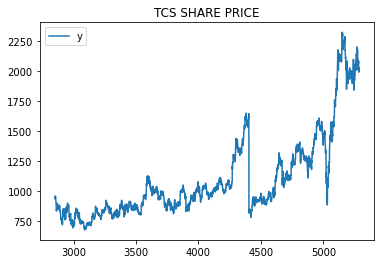

In [8]:
f_data.plot(title='TCS SHARE PRICE')

In [9]:
#convert ds column to datatime
f_data['ds']=pd.to_datetime(f_data['ds'])


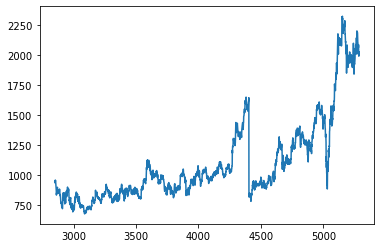

In [10]:
f_data['y'].plot()

**Define model**

In [11]:
model=Prophet()
model.fit(f_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
#predict NIFTY for next 365 days
future_dates=model.make_future_dataframe(periods=120)

In [13]:
#check future dates
future_dates

,ds
0,2011-06-01
1,2011-06-02
2,2011-06-03
3,2011-06-06
4,2011-06-07
...,...
2552,2021-07-25
2553,2021-07-26
2554,2021-07-27
2555,2021-07-28


In [14]:
#predict using model
prediction=model.predict(future_dates)

In [15]:
#check model predictions
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-06-01,803.261269,636.022151,957.095337,803.261269,803.261269,-7.341388,-7.341388,-7.341388,3.811675,3.811675,3.811675,-11.153063,-11.153063,-11.153063,0.0,0.0,0.0,795.919881
1,2011-06-02,803.166773,634.268868,944.278342,803.166773,803.166773,-7.298571,-7.298571,-7.298571,2.141493,2.141493,2.141493,-9.440064,-9.440064,-9.440064,0.0,0.0,0.0,795.868201
2,2011-06-03,803.072276,642.087172,958.834236,803.072276,803.072276,-3.919185,-3.919185,-3.919185,3.719568,3.719568,3.719568,-7.638752,-7.638752,-7.638752,0.0,0.0,0.0,799.153091
3,2011-06-06,802.788786,649.542536,963.916281,802.788786,802.788786,1.372263,1.372263,1.372263,3.265857,3.265857,3.265857,-1.893594,-1.893594,-1.893594,0.0,0.0,0.0,804.161048
4,2011-06-07,802.694289,651.967690,977.805477,802.694289,802.694289,3.456351,3.456351,3.456351,3.391470,3.391470,3.391470,0.064881,0.064881,0.064881,0.0,0.0,0.0,806.150640


In [16]:
#extract necessary columns & check future dates
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2552,2021-07-25,2337.507445,2177.883864,2482.031881
2553,2021-07-26,2347.661825,2194.001213,2509.266582
2554,2021-07-27,2349.781857,2189.447458,2503.648062
2555,2021-07-28,2351.891022,2185.312519,2514.601995
2556,2021-07-29,2351.617771,2200.172088,2504.884578


In [17]:
#check 
prediction[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2011-06-01,795.919881,636.022151,957.095337
1,2011-06-02,795.868201,634.268868,944.278342
2,2011-06-03,799.153091,642.087172,958.834236
3,2011-06-06,804.161048,649.542536,963.916281
4,2011-06-07,806.150640,651.967690,977.805477


**Plot predictions**

Text(0.5, 1.0, 'STOCK PRICE  TRENDS')

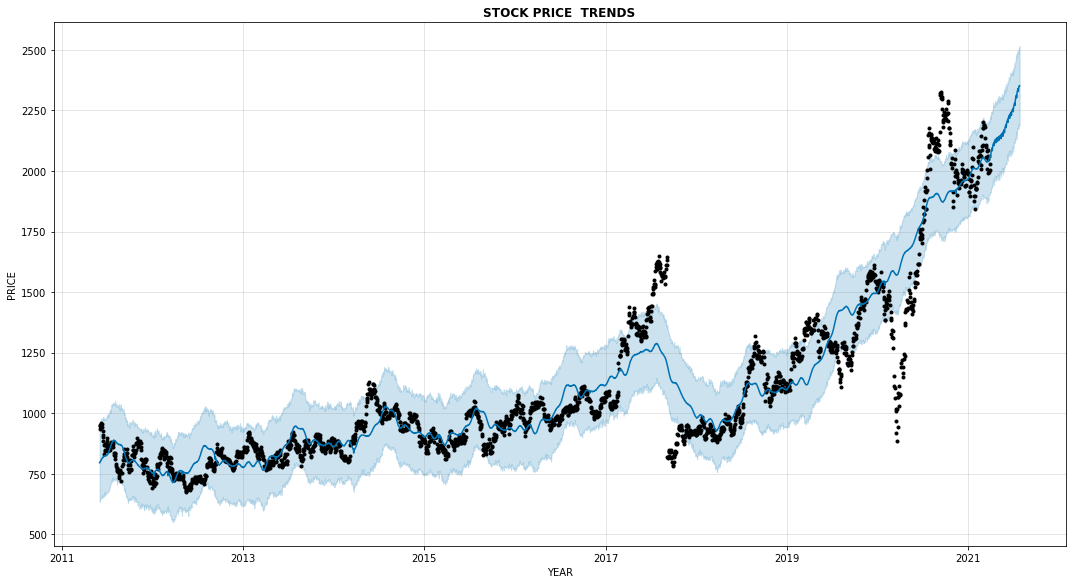

In [18]:
model.plot(prediction,figsize=(15,8),xlabel='YEAR',ylabel='PRICE')
plt.title('STOCK PRICE  TRENDS',WEIGHT='bold')

more deviation around 2019-2020 period due to pandemic

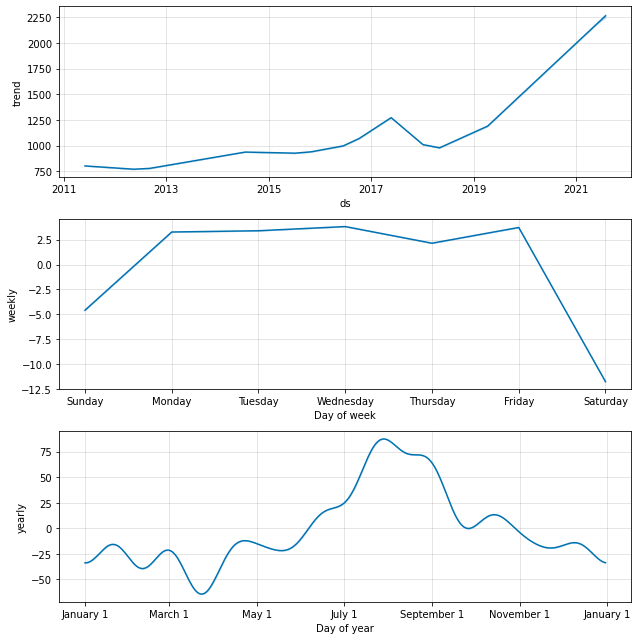

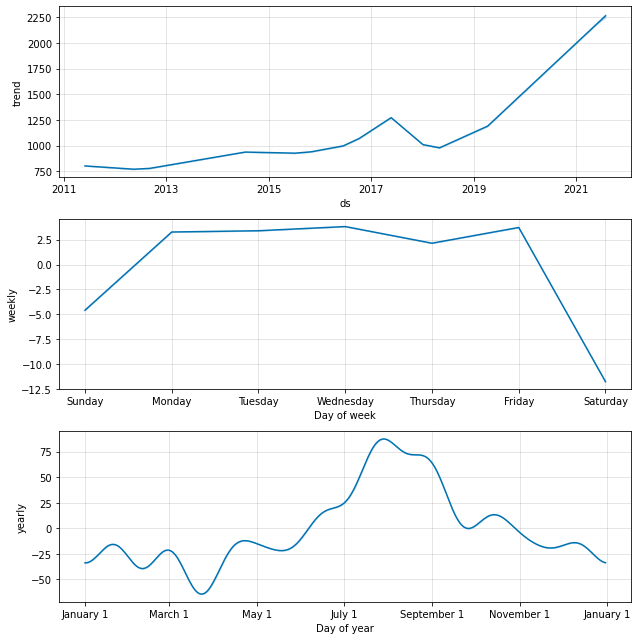

In [19]:
model.plot_components(prediction)

**Cross Validation**

In [20]:
f_data.shape

(2437, 2)

In [21]:
from fbprophet.diagnostics import cross_validation

In [22]:
data_cv=cross_validation(model,horizon='365 days',period='180 days',
                       initial='1024 days')

INFO:fbprophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2020-03-31 00:00:00


In [23]:
data_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
3206,2021-03-24,1673.800476,1486.902243,1865.234161,2047.30,2020-03-31
3207,2021-03-25,1673.827038,1481.207621,1868.638641,1991.45,2020-03-31
3208,2021-03-26,1678.059861,1480.102506,1869.605754,1994.65,2020-03-31
3209,2021-03-30,1692.700164,1489.814002,1889.586390,2029.30,2020-03-31
3210,2021-03-31,1699.691302,1512.663559,1904.124035,2003.10,2020-03-31


**Performance Metrics**

In [24]:
#get all the performance metrics like MAE, RMSE, MSE
from fbprophet.diagnostics import performance_metrics
data_performance=performance_metrics(data_cv)
data_performance.head(10)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,33520.651895,183.086460,136.885983,0.127443,0.084884,0.411215
1,38 days,33838.598820,183.952708,138.007455,0.128641,0.085146,0.401869
2,39 days,34398.819440,185.469187,139.645545,0.130369,0.085465,0.391485
3,40 days,34085.703003,184.623138,139.537764,0.130336,0.088399,0.389408
4,41 days,33717.937464,183.624447,139.369459,0.130200,0.085465,0.389408
5,42 days,33664.166630,183.477973,139.886532,0.130729,0.085146,0.378505
6,43 days,33488.723577,182.999245,140.112742,0.130795,0.085031,0.366909
7,44 days,33309.160498,182.507974,140.200919,0.130968,0.087799,0.356698
8,45 days,33500.405104,183.031159,140.642495,0.131652,0.085465,0.354102
9,46 days,33443.853447,182.876607,140.663574,0.131796,0.085465,0.353805


In [25]:
#function to check average errors over entire period
def check(df,col):
  sums=df[col].sum()
  lengths=len(df[col])
  return ('AVERAGE {} IS {}'.format(col,sums/lengths))

In [26]:
check(data_performance,'mae')

'AVERAGE mae IS 236.89757569684554'

In [27]:
check(data_performance,'rmse')

'AVERAGE rmse IS 282.130974871831'

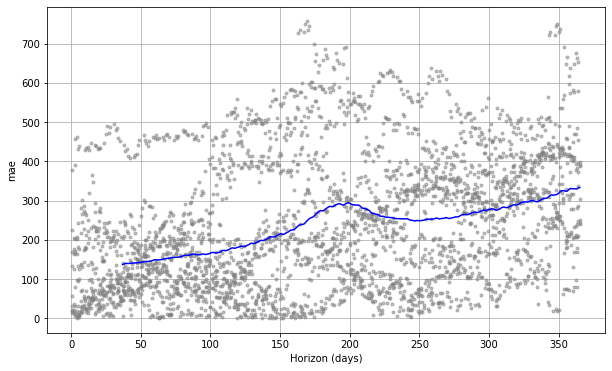

In [28]:
#plot error
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(data_cv,metric='mae')

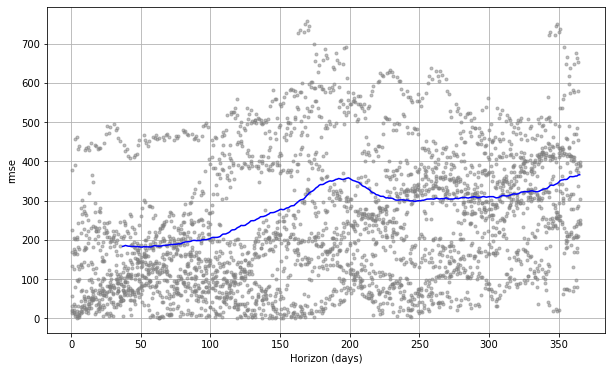

In [29]:
fig=plot_cross_validation_metric(data_cv,metric='rmse')

In [49]:
#save model
filename = 'prophetmodel.pk1'
pickle.dump(model,open(filename,'wb'))


In [50]:
#load model
load_model = pickle.load(open(filename,'rb'))